# Data Preparation

## Loading the MNIST dataset

In [1]:
from sklearn.datasets import fetch_openml
mnist = fetch_openml("mnist_784", version=1, as_frame=False)

In [2]:
mnist.keys()

dict_keys(['data', 'target', 'frame', 'categories', 'feature_names', 'target_names', 'DESCR', 'details', 'url'])

In [3]:
import numpy as np

X = mnist.data
y = mnist.target.astype(np.uint8)

In [4]:
X.shape

(70000, 784)

In [5]:
y.shape

(70000,)

In [6]:
# setting aside 10_000 examples for testing
X_train, X_test, y_train, y_test = X[:60_000], X[60_000:], y[:60_000], y[60_000:]

In [7]:
import matplotlib.pyplot as plt

def plot_digit(digit_aray):
    # a function for plotting the digit given it's array
    plt.imshow(digit_aray.reshape(28, 28), cmap="binary")
    plt.axis("off")
    plt.show()

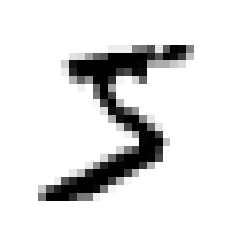

In [8]:
plot_digit(digit_aray=X_train[0])

In [9]:
import numpy as np

def switch_colors(digit_array):
    # function for changing all white colors to black and black colors to white
    return (np.full(len(digit_array), 255, dtype=int) - digit_array)


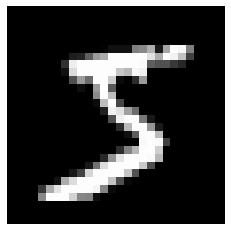

In [10]:
plot_digit(switch_colors(X_train[0]))

In [11]:
import numpy as np

def add_noise(digit_array, noise_intensity=1):
    # function for adding noise to the digits
    if 0 < noise_intensity <= 16:
        noise = noise_intensity * np.random.randint(5, 15, len(digit_array))
        return noise + digit_array
    # in case the noise intensity is not ranging from 1 to 16.
    else:
        raise ValueError("noise_intensity has to range from 1 to 16.")

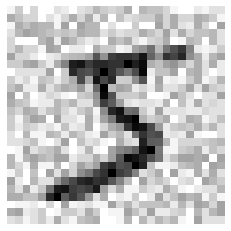

In [12]:
plot_digit(add_noise(X_train[0], noise_intensity=16))

In [13]:
from scipy.ndimage.interpolation import shift

def make_shift(digit_array, units_to_shift):
    # the numbers won't always be exactly in the middle of the image. shifted imgs will account for that
    digit_image = np.reshape(digit_array, (28, 28))
    shifted_digit = shift(digit_image, units_to_shift)
    return shifted_digit.reshape(784)

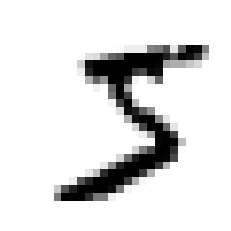

In [15]:
plot_digit(make_shift(X_train[0], [0, 2]))